# Opencup con PyArrow

i .parquet di Opencup sono molto pesanti; per leggerli con pandas occorrono più di 23 minuti

In [1]:
import pyarrow.parquet as pq
import pandas as pd
import glob
import duckdb

# some DuckDB setup 
con = duckdb.connect()
# enable automatic query parallelization
con.execute("PRAGMA threads=2")
# enable caching of parquet metadata
con.execute("PRAGMA enable_object_cache")

In [3]:
import os
os.chdir('D:/duckdb/files/Opencup')

df = con.execute("SELECT * FROM '*.parquet'").df()

df.info()

#   Column                          Dtype  
---  ------                          -----  
 0   CUP                             object 
 1   DESCRIZIONE_SINTETICA_CUP       object 
 2   ANNO_DECISIONE                  int64  
 3   STATO_PROGETTO                  object 
 4   COSTO_PROGETTO                  int64  
 5   FINANZIAMENTO_PROGETTO          int64  
 6   CODICE_STATO                    int64  
 7   STATO                           object 
 8   CODICE_AREA_GEOGRAFICA          object 
 9   AREA_GEOGRAFICA                 object 
 10  CODICE_REGIONE                  int64  
 11  REGIONE                         object 
 12  CODICE_PROVINCIA                int64  
 13  SIGLA_PROVINCIA                 object 
 14  PROVINCIA                       object 
 15  CODICE_COMUNE                   int64  
 16  COMUNE                          object 
 17  PIVA_CODFISCALE_SOG_TITOLARE    object 
 18  SOGGETTO_TITOLARE               object 
 19  INDIRIZZO_SOG_TITOLARE          object 
 20  TIPO_INDIRIZZO_SOG_TITOLARE     object 
 21  NUM_CIVICO_SOG_TITOLARE         object 
 22  LOCALITA_SOG_TITOLARE           object 
 23  CAP_SOGGETTO_TITOLARE           object 
 24  COMUNE_SOGGETTO_TITOLARE        object 
 25  CODICE_COMUNE_SOGG_TITOLARE     int64  
 26  CODICE_SOTTOCATEG_SOGGETTO      int64  
 27  SOTTOCATEGORIA_SOGGETTO         object 
 28  CODICE_CATEGORIA_SOGGETTO       int64  
 29  CATEGORIA_SOGGETTO              object 
 30  CODICE_AREA_SOGGETTO            object 
 31  AREA_SOGGETTO                   object 
 32  CODICE_NATURA_INTERVENTO        int64  
 33  NATURA_INTERVENTO               object 
 34  COD_NATURA_DIPE                 object 
 35  NATURA_DIPE                     object 
 36  CODICE_TIPO_INTERVENTO          int64  
 37  TIPOLOGIA_INTERVENTO            object 
 38  CODICE_AREA_INTERVENTO          int64  
 39  AREA_INTERVENTO                 object 
 40  CODICE_SETTORE_INTERVENTO       int64  
 41  SETTORE_INTERVENTO              object 
 42  CODICE_SOTTOSETTORE_INTERVENTO  int64  
 43  SOTTOSETTORE_INTERVENTO         object 
 44  CODICE_CATEGORIA_INTERVENTO     int64  
 45  CATEGORIA_INTERVENTO            object 
 46  SOGGETTO_RICHIEDENTE            object 
 47  TIPO_CUP                        object 
 48  DESCRIZIONE_INTERVENTO          object 
 49  DENO_IMPRESA_STABILIMENTO       object 
 50  PIVA_CF_BENEFICIARIO            object 
 51  DENO_IMPRESA_STABILIMENTO_PREC  object 
 52  DENOMINAZIONE_BENEFICIARIO      object 
 53  STRUTTURA_INFRASTRUTTURA        object 
 54  INDIRIZZO_INTERVENTO            object 
 55  NUMERO_DELIBERA_CIPE            object 
 56  ANNO_DELIBERA                   object 
 57  FLAG_LEGGE_OBIETTIVO            object 
 58  FLAG_TIPO_GENERICO              object 
 59  CUP_IN_RELAZIONE                object 
 60  RUOLO_IN_RELAZIONE              object 
 61  DESC_TIPO_RELAZIONE             object 
 62  DATA_ULTIMA_MODIFICA_SSC        object 
 63  DATA_ULTIMA_MODIFICA_UTENTE     object 
 64  DATA_CHIUSURA_REVOCA            object 
 65  CODICE_LOCALE_PROGETTO          object 
 66  CODICE_STRUMENTO_PROGRAM        int64  
 67  STRUMENTO_PROGRAMMAZIONE        object 
 68  CODICE_COPERTURA_FINANZIARIA    float64
 69  COPERTURA_FINANZIARIA           object 
 70  FINANZA_PROGETTO                object 
 71  SPONSORIZZAZIONI                object 
 72  ALTRE_INFORMAZIONI              object 
 73  DATA_GENERAZIONE_CUP            object 
 74  CONTROLLO_QUALITA               object 
 75  CUP_MASTER                      object 
 76  RAGIONI_COLLEGAMENTO            object 
 77  LINK_OPENCOESIONE               object 
 78  LINK_SCUOLE_SICURE              object 
 79  COD_SEZIONE_ATECO               object 
 80  SEZIONE_ATECO                   object 
 81  COD_DIVISIONE_ATECO             float64
 82  DIVISIONE_ATECO                 object 
 83  COD_GRUPPO_ATECO                object 
 84  GRUPPO_ATECO                    object 
 85  COD_CLASSE_ATECO                object 
 86  CLASSE_ATECO                    object 
 87  COD_CATEGORIA_ATECO             object 
 88  CATEGORIA_ATECO                 object 
 89  COD_SOTTOCATEG_ATECO            object 
 90  SOTTOCATEGORIA_ATECO            object 
dtypes: float64(2), int64(17), object(72)
memory usage: 9.5+ GB

In [4]:
%%time
# DuckDB
print(con.execute("SELECT COUNT(*) FROM 'OpenData Complessivo.parquet'").df())

   count_star()
0      14440343
CPU times: total: 15.6 ms
Wall time: 13.1 ms


In [5]:
df = con.execute("SELECT * from 'OpenData Complessivo.parquet' limit 1").df()

In [8]:
df

,CUP,DESCRIZIONE_SINTETICA_CUP,ANNO_DECISIONE,STATO_PROGETTO,COSTO_PROGETTO,FINANZIAMENTO_PROGETTO,CODICE_STATO,STATO,CODICE_AREA_GEOGRAFICA,AREA_GEOGRAFICA,...,COD_DIVISIONE_ATECO,DIVISIONE_ATECO,COD_GRUPPO_ATECO,GRUPPO_ATECO,COD_CLASSE_ATECO,CLASSE_ATECO,COD_CATEGORIA_ATECO,CATEGORIA_ATECO,COD_SOTTOCATEG_ATECO,SOTTOCATEGORIA_ATECO
0,B93G99000090015,ITALJOLLY - COMPAGNIA ITALIANA DEI JOLLY HOTELS *PALERMO *00169650249 *Albergo con ristorante,2001,ATTIVO,4659990,817290,5,ITALIA,I,ISOLE,...,55.0,ALLOGGIO,55.1,ALBERGHI E STRUTTURE SIMILI,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
%%time
# DuckDB
con.execute("SELECT * from 'OpenData Complessivo.parquet' where cup ='E27H21008350006'").df()

CPU times: total: 14.8 s
Wall time: 15.3 s


,CUP,DESCRIZIONE_SINTETICA_CUP,ANNO_DECISIONE,STATO_PROGETTO,COSTO_PROGETTO,FINANZIAMENTO_PROGETTO,CODICE_STATO,STATO,CODICE_AREA_GEOGRAFICA,AREA_GEOGRAFICA,...,COD_DIVISIONE_ATECO,DIVISIONE_ATECO,COD_GRUPPO_ATECO,GRUPPO_ATECO,COD_CLASSE_ATECO,CLASSE_ATECO,COD_CATEGORIA_ATECO,CATEGORIA_ATECO,COD_SOTTOCATEG_ATECO,SOTTOCATEGORIA_ATECO
0,E27H21008350006,BATTIPAGLIA- POTENZIAMENTO AREA DELLA LOGISTIC...,2021,ATTIVO,13000000,13000000,5,ITALIA,S,SUD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
%%time
# DuckDB
df = (con.execute("SELECT * from 'OpenData Complessivo.parquet' where STRUMENTO_PROGRAMMAZIONE ='ALTRO' and PIVA_CODFISCALE_SOG_TITOLARE = '97828370581'").df())
df

CPU times: total: 2.84 s
Wall time: 11.7 s


,CUP,DESCRIZIONE_SINTETICA_CUP,ANNO_DECISIONE,STATO_PROGETTO,COSTO_PROGETTO,FINANZIAMENTO_PROGETTO,CODICE_STATO,STATO,CODICE_AREA_GEOGRAFICA,AREA_GEOGRAFICA,CODICE_REGIONE,REGIONE,CODICE_PROVINCIA,SIGLA_PROVINCIA,PROVINCIA,CODICE_COMUNE,COMUNE,PIVA_CODFISCALE_SOG_TITOLARE,SOGGETTO_TITOLARE,INDIRIZZO_SOG_TITOLARE,TIPO_INDIRIZZO_SOG_TITOLARE,NUM_CIVICO_SOG_TITOLARE,LOCALITA_SOG_TITOLARE,CAP_SOGGETTO_TITOLARE,COMUNE_SOGGETTO_TITOLARE,CODICE_COMUNE_SOGG_TITOLARE,CODICE_SOTTOCATEG_SOGGETTO,SOTTOCATEGORIA_SOGGETTO,CODICE_CATEGORIA_SOGGETTO,CATEGORIA_SOGGETTO,CODICE_AREA_SOGGETTO,AREA_SOGGETTO,CODICE_NATURA_INTERVENTO,NATURA_INTERVENTO,COD_NATURA_DIPE,NATURA_DIPE,CODICE_TIPO_INTERVENTO,TIPOLOGIA_INTERVENTO,CODICE_AREA_INTERVENTO,AREA_INTERVENTO,CODICE_SETTORE_INTERVENTO,SETTORE_INTERVENTO,CODICE_SOTTOSETTORE_INTERVENTO,SOTTOSETTORE_INTERVENTO,CODICE_CATEGORIA_INTERVENTO,CATEGORIA_INTERVENTO,SOGGETTO_RICHIEDENTE,TIPO_CUP,DESCRIZIONE_INTERVENTO,DENO_IMPRESA_STABILIMENTO,PIVA_CF_BENEFICIARIO,DENO_IMPRESA_STABILIMENTO_PREC,DENOMINAZIONE_BENEFICIARIO,STRUTTURA_INFRASTRUTTURA,INDIRIZZO_INTERVENTO,NUMERO_DELIBERA_CIPE,ANNO_DELIBERA,FLAG_LEGGE_OBIETTIVO,FLAG_TIPO_GENERICO,CUP_IN_RELAZIONE,RUOLO_IN_RELAZIONE,DESC_TIPO_RELAZIONE,DATA_ULTIMA_MODIFICA_SSC,DATA_ULTIMA_MODIFICA_UTENTE,DATA_CHIUSURA_REVOCA,CODICE_LOCALE_PROGETTO,CODICE_STRUMENTO_PROGRAM,STRUMENTO_PROGRAMMAZIONE,CODICE_COPERTURA_FINANZIARIA,COPERTURA_FINANZIARIA,FINANZA_PROGETTO,SPONSORIZZAZIONI,ALTRE_INFORMAZIONI,DATA_GENERAZIONE_CUP,CONTROLLO_QUALITA,CUP_MASTER,RAGIONI_COLLEGAMENTO,LINK_OPENCOESIONE,LINK_SCUOLE_SICURE,COD_SEZIONE_ATECO,SEZIONE_ATECO,COD_DIVISIONE_ATECO,DIVISIONE_ATECO,COD_GRUPPO_ATECO,GRUPPO_ATECO,COD_CLASSE_ATECO,CLASSE_ATECO,COD_CATEGORIA_ATECO,CATEGORIA_ATECO,COD_SOTTOCATEG_ATECO,SOTTOCATEGORIA_ATECO
0,E37H21010750006,MARCIANISE-MADDALONI: INFRASTRUTTURE PER LA MOBILITA DELLE MERCI E SISTEMAZIONE DEI PIAZZALI E STRADE DI ACCESSO*VIA COMUNI DI MADDALONI E MARCIANISE*INFRASTRUTTURE PER LA MOBILITA DELLE MERCI E SISTEMAZIONE DEI PIAZZALI E STRADE DI ACCESSO,2021,ATTIVO,30000000,30000000,5,ITALIA,S,SUD,15,CAMPANIA,61,CE,CASERTA,61048,MADDALONI,97828370581,AGENZIA PER LA COESIONE TERRITORIALE,SICILIA,VIA,162,NaN,00187,ROMA,58091,3,AGENZIE DELLO STATO,2,AMMINISTRAZIONI DELLO STATO,PAC,AMMINISTRAZIONI CENTRALI,3,REALIZZAZIONE DI LAVORI PUBBLICI (OPERE ED IMPIANTISTICA),LP,Lavori pubblici,7,MANUTENZIONE STRAORDINARIA,2,TRASPORTI,1,INFRASTRUTTURE DI TRASPORTO,5,TRASPORTO URBANO,999,ALTRI STRUTTURE/INFRASTRUTTURE DI TRASPORTO URBANE,AGENZIA PER LA COESIONE TERRITORIALE,NORMALE,INFRASTRUTTURE PER LA MOBILITA DELLE MERCI E SISTEMAZIONE DEI PIAZZALI E STRADE DI ACCESSO,NaN,***************,NaN,NaN,MARCIANISE-MADDALONI: INFRASTRUTTURE PER LA MOBILITA DELLE MERCI E SISTEMAZIONE DEI PIAZZALI E STRADE DI ACCESSO,VIA COMUNI DI MADDALONI E MARCIANISE,DATO NON PRESENTE,DATO NON PRESENTE,N,SI,NaN,NaN,NaN,NaN,01-DEC-21,NaN,NaN,99,ALTRO,6,COMUNITARIA,NO,NON PREVISTE,NaN,30-NOV-21,Il corredo informativo del CUP non e stato visionato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E97H21010050006,"LECCE - RETI MATERIALI - RIFUNZIONALIZZAZIONE ED EFFICIENTAMENTO RETI VIARIE, IDRICHE E FOGNARIE (LECCE E NARDO GALATONE)*VIA COMUNI DI LECCE, NARDO E GALATONE*RETI MATERIALI - RIFUNZIONALIZZAZIONE ED EFFICIENTAMENTO RETI VIARIE, IDRICHE E FOGNARIE (LECCE E NARDO GALATONE)",2021,ATTIVO,3800000,3800000,5,ITALIA,S,SUD,16,PUGLIA,75,LE,LECCE,75030,GALATONE,97828370581,AGENZIA PER LA COESIONE TERRITORIALE,SICILIA,VIA,162,NaN,00187,ROMA,58091,3,AGENZIE DELLO STATO,2,AMMINISTRAZIONI DELLO STATO,PAC,AMMINISTRAZIONI CENTRALI,3,REALIZZAZIONE DI LAVORI PUBBLICI (OPERE ED IMPIANTISTICA),LP,Lavori pubblici,7,MANUTENZIONE STRAORDINARIA,3,AMBIENTE ED ENERGIA,2,INFRASTRUTTURE AMBIENTALI E RISORSE IDRICHE,15,RISORSE IDRICHE E ACQUE REFLUE,999,ALTRE STRUTTURE/INFRASTRUTTURE PER L'UTILIZZO DELLE RISORSE IDRICHE,AGENZIA PER LA COESIONE TERRITORIALE,MASTER,"RETI MATERIALI - RIFUNZIONALIZZAZIONE E

In [38]:
df.columns

Index(['CUP', 'DESCRIZIONE_SINTETICA_CUP', 'ANNO_DECISIONE', 'STATO_PROGETTO',
       'COSTO_PROGETTO', 'FINANZIAMENTO_PROGETTO', 'CODICE_STATO', 'STATO',
       'CODICE_AREA_GEOGRAFICA', 'AREA_GEOGRAFICA', 'CODICE_REGIONE',
       'REGIONE', 'CODICE_PROVINCIA', 'SIGLA_PROVINCIA', 'PROVINCIA',
       'CODICE_COMUNE', 'COMUNE', 'PIVA_CODFISCALE_SOG_TITOLARE',
       'SOGGETTO_TITOLARE', 'INDIRIZZO_SOG_TITOLARE',
       'TIPO_INDIRIZZO_SOG_TITOLARE', 'NUM_CIVICO_SOG_TITOLARE',
       'LOCALITA_SOG_TITOLARE', 'CAP_SOGGETTO_TITOLARE',
       'COMUNE_SOGGETTO_TITOLARE', 'CODICE_COMUNE_SOGG_TITOLARE',
       'CODICE_SOTTOCATEG_SOGGETTO', 'SOTTOCATEGORIA_SOGGETTO',
       'CODICE_CATEGORIA_SOGGETTO', 'CATEGORIA_SOGGETTO',
       'CODICE_AREA_SOGGETTO', 'AREA_SOGGETTO', 'CODICE_NATURA_INTERVENTO',
       'NATURA_INTERVENTO', 'COD_NATURA_DIPE', 'NATURA_DIPE',
       'CODICE_TIPO_INTERVENTO', 'TIPOLOGIA_INTERVENTO',
       'CODICE_AREA_INTERVENTO', 'AREA_INTERVENTO',
       'CODICE_SETTORE_INTER

In [ ]:
STRUMENTO DI PROGRAMMAZIONE

ALTRO-PIANO NAZIONALE DI RIPRESA E RESILIENZA, MISURA M5C3-11  INVESTIMENTO 4 INTERVENTI INFRASTRUTTURALI PER LE ZONE ECONOMICHE SPECIALI (ZES)


In [39]:
df

,CUP,DESCRIZIONE_SINTETICA_CUP,ANNO_DECISIONE,STATO_PROGETTO,COSTO_PROGETTO,FINANZIAMENTO_PROGETTO,CODICE_STATO,STATO,CODICE_AREA_GEOGRAFICA,AREA_GEOGRAFICA,CODICE_REGIONE,REGIONE,CODICE_PROVINCIA,SIGLA_PROVINCIA,PROVINCIA,CODICE_COMUNE,COMUNE,PIVA_CODFISCALE_SOG_TITOLARE,SOGGETTO_TITOLARE,INDIRIZZO_SOG_TITOLARE,TIPO_INDIRIZZO_SOG_TITOLARE,NUM_CIVICO_SOG_TITOLARE,LOCALITA_SOG_TITOLARE,CAP_SOGGETTO_TITOLARE,COMUNE_SOGGETTO_TITOLARE,CODICE_COMUNE_SOGG_TITOLARE,CODICE_SOTTOCATEG_SOGGETTO,SOTTOCATEGORIA_SOGGETTO,CODICE_CATEGORIA_SOGGETTO,CATEGORIA_SOGGETTO,CODICE_AREA_SOGGETTO,AREA_SOGGETTO,CODICE_NATURA_INTERVENTO,NATURA_INTERVENTO,COD_NATURA_DIPE,NATURA_DIPE,CODICE_TIPO_INTERVENTO,TIPOLOGIA_INTERVENTO,CODICE_AREA_INTERVENTO,AREA_INTERVENTO,CODICE_SETTORE_INTERVENTO,SETTORE_INTERVENTO,CODICE_SOTTOSETTORE_INTERVENTO,SOTTOSETTORE_INTERVENTO,CODICE_CATEGORIA_INTERVENTO,CATEGORIA_INTERVENTO,SOGGETTO_RICHIEDENTE,TIPO_CUP,DESCRIZIONE_INTERVENTO,DENO_IMPRESA_STABILIMENTO,PIVA_CF_BENEFICIARIO,DENO_IMPRESA_STABILIMENTO_PREC,DENOMINAZIONE_BENEFICIARIO,STRUTTURA_INFRASTRUTTURA,INDIRIZZO_INTERVENTO,NUMERO_DELIBERA_CIPE,ANNO_DELIBERA,FLAG_LEGGE_OBIETTIVO,FLAG_TIPO_GENERICO,CUP_IN_RELAZIONE,RUOLO_IN_RELAZIONE,DESC_TIPO_RELAZIONE,DATA_ULTIMA_MODIFICA_SSC,DATA_ULTIMA_MODIFICA_UTENTE,DATA_CHIUSURA_REVOCA,CODICE_LOCALE_PROGETTO,CODICE_STRUMENTO_PROGRAM,STRUMENTO_PROGRAMMAZIONE,CODICE_COPERTURA_FINANZIARIA,COPERTURA_FINANZIARIA,FINANZA_PROGETTO,SPONSORIZZAZIONI,ALTRE_INFORMAZIONI,DATA_GENERAZIONE_CUP,CONTROLLO_QUALITA,CUP_MASTER,RAGIONI_COLLEGAMENTO,LINK_OPENCOESIONE,LINK_SCUOLE_SICURE,COD_SEZIONE_ATECO,SEZIONE_ATECO,COD_DIVISIONE_ATECO,DIVISIONE_ATECO,COD_GRUPPO_ATECO,GRUPPO_ATECO,COD_CLASSE_ATECO,CLASSE_ATECO,COD_CATEGORIA_ATECO,CATEGORIA_ATECO,COD_SOTTOCATEG_ATECO,SOTTOCATEGORIA_ATECO


In [5]:
%%time
pd.set_option('display.max_column', None)
pd.options.display.float_format = '{:.0f}'.format #suppress scientific notation

CPU times: total: 0 ns
Wall time: 0 ns


In [5]:
%%time
df = con.execute("SELECT REGIONE, COUNT(PIVA_CF_BENEFICIARIO) \
beneficiari , sum(FINANZIAMENTO_PROGETTO)/1000000 finanziamenti_M€ FROM '*.parquet' \
where PIVA_CF_BENEFICIARIO <> '***************' \
group by REGIONE order by 2 desc").df()
df

CPU times: total: 4.62 s
Wall time: 2.33 s


,REGIONE,beneficiari,finanziamenti_M€
0,EMILIA-ROMAGNA,1243331,25097.781829
1,SARDEGNA,1239930,16757.490997
2,LOMBARDIA,1155678,85765.666070
3,CAMPANIA,1090348,49988.416702
4,VENETO,946972,24202.476836
5,PIEMONTE,783398,19631.629343
6,CALABRIA,550045,34127.628026
7,TOSCANA,471929,14015.806216
8,TRENTINO-ALTO ADIGE,459500,7551.476041
9,PUGLIA,403927,42801.619526


In [7]:
%%time
df = con.execute("SELECT(FINANZIAMENTO_PROGETTO) finanziamenti\
     FROM '*.parquet'").df()

CPU times: total: 188 ms
Wall time: 203 ms


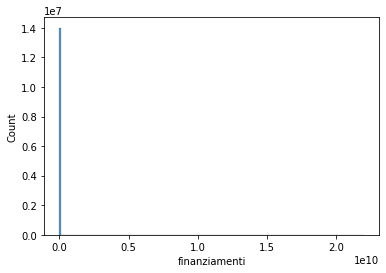

In [9]:
import seaborn as sns
sns.histplot(data=df, x='finanziamenti', bins=200);

## queries

In [10]:
import pyarrow.parquet as pq
parquetfile = 'OpenData Complessivo.parquet'

In [ ]:
table = pq.read_table(parquetfile)

In [17]:
print(table)

pyarrow.Table
CUP: string
DESCRIZIONE_SINTETICA_CUP: string
ANNO_DECISIONE: int64
STATO_PROGETTO: string
COSTO_PROGETTO: int64
FINANZIAMENTO_PROGETTO: int64
CODICE_STATO: int64
STATO: string
CODICE_AREA_GEOGRAFICA: string
AREA_GEOGRAFICA: string
CODICE_REGIONE: int64
REGIONE: string
CODICE_PROVINCIA: int64
SIGLA_PROVINCIA: string
PROVINCIA: string
CODICE_COMUNE: int64
COMUNE: string
PIVA_CODFISCALE_SOG_TITOLARE: string
SOGGETTO_TITOLARE: string
INDIRIZZO_SOG_TITOLARE: string
TIPO_INDIRIZZO_SOG_TITOLARE: string
NUM_CIVICO_SOG_TITOLARE: string
LOCALITA_SOG_TITOLARE: string
CAP_SOGGETTO_TITOLARE: string
COMUNE_SOGGETTO_TITOLARE: string
CODICE_COMUNE_SOGG_TITOLARE: int64
CODICE_SOTTOCATEG_SOGGETTO: int64
SOTTOCATEGORIA_SOGGETTO: string
CODICE_CATEGORIA_SOGGETTO: int64
CATEGORIA_SOGGETTO: string
CODICE_AREA_SOGGETTO: string
AREA_SOGGETTO: string
CODICE_NATURA_INTERVENTO: int64
NATURA_INTERVENTO: string
COD_NATURA_DIPE: string
NATURA_DIPE: string
CODICE_TIPO_INTERVENTO: int64
TIPOLOGIA_INTER

In [8]:
table.to_pandas()

,CUP,DESCRIZIONE_SINTETICA_CUP,ANNO_DECISIONE,STATO_PROGETTO,COSTO_PROGETTO,FINANZIAMENTO_PROGETTO,CODICE_STATO,STATO,CODICE_AREA_GEOGRAFICA,AREA_GEOGRAFICA,CODICE_REGIONE,REGIONE,CODICE_PROVINCIA,SIGLA_PROVINCIA,PROVINCIA,CODICE_COMUNE,COMUNE,PIVA_CODFISCALE_SOG_TITOLARE,SOGGETTO_TITOLARE,INDIRIZZO_SOG_TITOLARE,TIPO_INDIRIZZO_SOG_TITOLARE,NUM_CIVICO_SOG_TITOLARE,LOCALITA_SOG_TITOLARE,CAP_SOGGETTO_TITOLARE,COMUNE_SOGGETTO_TITOLARE,CODICE_COMUNE_SOGG_TITOLARE,CODICE_SOTTOCATEG_SOGGETTO,SOTTOCATEGORIA_SOGGETTO,CODICE_CATEGORIA_SOGGETTO,CATEGORIA_SOGGETTO,CODICE_AREA_SOGGETTO,AREA_SOGGETTO,CODICE_NATURA_INTERVENTO,NATURA_INTERVENTO,COD_NATURA_DIPE,NATURA_DIPE,CODICE_TIPO_INTERVENTO,TIPOLOGIA_INTERVENTO,CODICE_AREA_INTERVENTO,AREA_INTERVENTO,CODICE_SETTORE_INTERVENTO,SETTORE_INTERVENTO,CODICE_SOTTOSETTORE_INTERVENTO,SOTTOSETTORE_INTERVENTO,CODICE_CATEGORIA_INTERVENTO,CATEGORIA_INTERVENTO,SOGGETTO_RICHIEDENTE,TIPO_CUP,DESCRIZIONE_INTERVENTO,DENO_IMPRESA_STABILIMENTO,PIVA_CF_BENEFICIARIO,DENO_IMPRESA_STABILIMENTO_PREC,DENOMINAZIONE_BENEFICIARIO,STRUTTURA_INFRASTRUTTURA,INDIRIZZO_INTERVENTO,NUMERO_DELIBERA_CIPE,ANNO_DELIBERA,FLAG_LEGGE_OBIETTIVO,FLAG_TIPO_GENERICO,CUP_IN_RELAZIONE,RUOLO_IN_RELAZIONE,DESC_TIPO_RELAZIONE,DATA_ULTIMA_MODIFICA_SSC,DATA_ULTIMA_MODIFICA_UTENTE,DATA_CHIUSURA_REVOCA,CODICE_LOCALE_PROGETTO,CODICE_STRUMENTO_PROGRAM,STRUMENTO_PROGRAMMAZIONE,CODICE_COPERTURA_FINANZIARIA,COPERTURA_FINANZIARIA,FINANZA_PROGETTO,SPONSORIZZAZIONI,ALTRE_INFORMAZIONI,DATA_GENERAZIONE_CUP,CONTROLLO_QUALITA,CUP_MASTER,RAGIONI_COLLEGAMENTO,LINK_OPENCOESIONE,LINK_SCUOLE_SICURE,COD_SEZIONE_ATECO,SEZIONE_ATECO,COD_DIVISIONE_ATECO,DIVISIONE_ATECO,COD_GRUPPO_ATECO,GRUPPO_ATECO,COD_CLASSE_ATECO,CLASSE_ATECO,COD_CATEGORIA_ATECO,CATEGORIA_ATECO,COD_SOTTOCATEG_ATECO,SOTTOCATEGORIA_ATECO
0,B93G99000090015,ITALJOLLY - COMPAGNIA ITALIANA DEI JOLLY HOTELS *PALERMO *00169650249 *Albergo con ristorante,2001,ATTIVO,4659990,817290,5,ITALIA,I,ISOLE,19,SICILIA,82,PA,PALERMO,82053,PALERMO,80230390587,MINISTERO DELLE IMPRESE E DEL MADE IN ITALY,MOLISE,VIA,2,ROMA,00187,ROMA,58091,2,MINISTERI,2,AMMINISTRAZIONI DELLO STATO,PAC,AMMINISTRAZIONI CENTRALI,7,CONCESSIONE DI INCENTIVI AD UNITA' PRODUTTIVE,PR,Incentivi,15,AMMODERNAMENTO,4,AREE PRODUTTIVE,6,"OPERE, IMPIANTI ED ATTREZZATURE PER ATTIVITA' PRODUTTIVE, E LA RICERCA E L'IMPRESA SOCIALE",41,OPERE E STRUTTURE PER IL TURISMO,155,ALBERGHI,MINISTERO DELLO SVILUPPO ECONOMICO,COLLEGATO,DATO NON PRESENTE,None,***************,None,None,DATO NON PRESENTE,DATO NON PRESENTE,DATO NON PRESENTE,DATO NON PRESENTE,DATO NON PRESENTE,NO,None,None,None,04-FEB-05,None,None,00443700120009,99,ALTRO,6,COMUNITARIA,DATO NON PRESENTE,DATO NON PRESENTE,ITALJOLLY - COMPAGNIA ITALIANA DEI JOLLY HOTE,01-JAN-03,Il corredo informativo del CUP non e stato visionato,B93G99000090008,None,None,None,I,ATTIVITA' DEI SERVIZI DI ALLOGGIO E DI RISTORAZIONE,55,ALLOGGIO,55.1,ALBERGHI E STRUTTURE SIMILI,None,None,None,None,None,None
1,I35D05000030006,ADEGUAMENTO E COMPLETAMENTO IMPIANTI SPORTIVI LOCALITA' STADOLINA E CORTAIOLO,2005,CHIUSO,165000,165000,5,ITALIA,NO,NORD-OVEST,3,LOMBARDIA,17,BS,BRESCIA,17202,VIONE,00837510171,COMUNE DI VIONE - BRESCIA -,PIAZZA VITTORIA,None,1,VIONE,25050,VIONE,17202,4,AMMINISTRAZIONI COMUNALI,7,ENTI TERRITORIALI E DI AMMINISTRAZIONE DEL TERRITORIO,PAL,AMMINISTRAZIONI LOCALI,3,REALIZZAZIONE DI LAVORI PUBBLICI (OPERE ED IMPIANTISTICA),LP,Lavori pubblici,7,MANUTENZIONE STRAORDINARIA,1,IMMOBILI,5,INFRASTRUTTURE SOCIALI,12,"SPORT, SPETTACOLO E TEMPO LIBERO",98,IMPIANTI SPORTIVI,COMUNE DI VIONE - BRESCIA -,NORMALE,DATO NON PRESENTE,None,***************,None,None,DATO NON PRESENTE,DATO NON PRESENTE,DATO NON PRESENTE,DATO NON PRESENTE,N,NO,None,None,None,None,None,27-SEP-14,None,99,ALTRO,4,COMUNALE,DATO NON PRESENTE,DATO NON PRESENTE,ADEGUAMENTO E COMPLETAMENTO IMPIANTI SPORTIVI,25-MAY-05,Il corredo informativo del CUP non e stato visionato,None,None,None,None,O,AMMINISTRAZIONE PUBBLICA E DIFESA; ASSICURAZIONE SOCIALE OBBLIGATORI

## Inspecting the Parquet File Metadata

In [11]:
parquet_file = pq.ParquetFile(parquetfile)
metadata = parquet_file.metadata
metadata

In [14]:
# oppure
metadata = pq.read_metadata(parquetfile)
metadata

  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 91
  num_rows: 14440343
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 52851

In [15]:
metadata.row_group(0)

  num_columns: 91
  num_rows: 14440343
  total_byte_size: 6130113438

In [16]:
metadata.row_group(0).column(0)

  file_offset: 140160065
  file_path: 
  physical_type: BYTE_ARRAY
  num_values: 14440343
  path_in_schema: CUP
  is_stats_set: True
  statistics:
      has_min_max: True
      min: B10A06000010014
      max: J99J99000020001
      null_count: 0
      distinct_count: 0
      num_values: 14440343
      physical_type: BYTE_ARRAY
      logical_type: String
      converted_type (legacy): UTF8
  compression: SNAPPY
  encodings: ('RLE_DICTIONARY', 'PLAIN', 'RLE', 'PLAIN')
  has_dictionary_page: True
  dictionary_page_offset: 4
  data_page_offset: 545498
  total_compressed_size: 140160061
  total_uncompressed_size: 274491509